## ML 과제

과제할 때 꿀팁!

1. 이전 세션들에서의 자료를 찾아본다.
2. 질문방에 질문한다.
3. 구글링한다.
4. 복붙하지 않고 직접 타이핑해서 코드를 완성한다.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

### 0. Titanic 데이터 로드 및 훓어보기

In [2]:
# 여러분이 이전 과제로 만드셨을 FE를 진행한 데이터 보다는 원본 데이터가 조금 더 이번 실습에 적합하기 때문에 원본을 사용하겠습니다.
# 데이터를 로드하고, 잘 불러와진 것인지 첫 5행을 불러와 확인해보세요.

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 변수들의 데이터 타입, 결측치, target의 imbalance 여부를 확인해주세요.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.groupby("Survived").size()

Survived
0    549
1    342
dtype: int64

In [6]:
# 편의상 결측치 데이터 및 승객 고유의 데이터('PassengerId','Name', 'Ticket', 'Cabin')는 모두 drop 시킵시다.
# 실제 프로젝트에서는 이렇게 하시면 성능이 낮을 수 있어요!!
titanic.drop(["Age", "PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [7]:
# categorical feature(Sex, Embarked)에 대해 LabelEncoding을 진행해 주세요.
# 전처리 완료된 DataFrame을 첫 5행을 불러와 확인해보세요
titanic['Sex'] = titanic['Sex'].map({"female":0, "male":1})
titanic['Embarked'] = titanic['Embarked'].map({'C':0, 'Q':1, 'S':2, np.nan:4})
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2


### 1. Train-Test split & 종속변수-설명변수 분할

In [8]:
# 분할을 위해 필요한 적절한 패키지를 불러와주세요 
# train-test split 및 종속변수-설명변수 분할을 진행해주세요
from sklearn.model_selection import train_test_split

y = titanic.Survived
X = titanic.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

### 2. Decision Tree를 통한 Classification

In [9]:
# Decision Tree에서 categorical feature인 'Pclass'를 기준으로 첫 번째 Node(Root Node)가 분리된다고 가정합시다.
# 이 때 Entropy 지표를 통해 Information Gain을 계산할 수 있는 함수(또는 코드)를 작성하고, Information gain을 계산하세요.
# 실습에서 다루지 않은 내용입니다. 코드가 어려우시다면 줄글로만 풀이과정을 작성해주셔도 됩니다.

# titanic data로 Pclass를 분리기준으로 이용했을 때의 entropy를 계산하는 상황만 고려하시면 됩니다.
# 계산에 사용할 데이터는 분할 이전의 0번에서 전처리 완료한 데이터를 기준으로 하겠습니다!
# 올바르게 계산할 시 Information Gain은 0.0097이 나옵니다.

##### <b>줄글 답안</b>
>Pclass를 기준으로 분류 되기 전 계산한 entropy 불순도에서, 분류 후 불순도를 빼면 Information gain 값을 계산할 수 있습니다.

In [10]:
# Decision Tree 모델을 사용하기 위한 적절한 패키지를 불러와 주세요
# 별 다른 parameter 설정 없이 객체를 만들어 주고, 학습을 진행하세요
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### 3. Graphviz를 통한 시각화

graphviz 설치를 하지 않으셨거나 오류가 난다면 이 부분은 건너뛰셔도 좋습니다

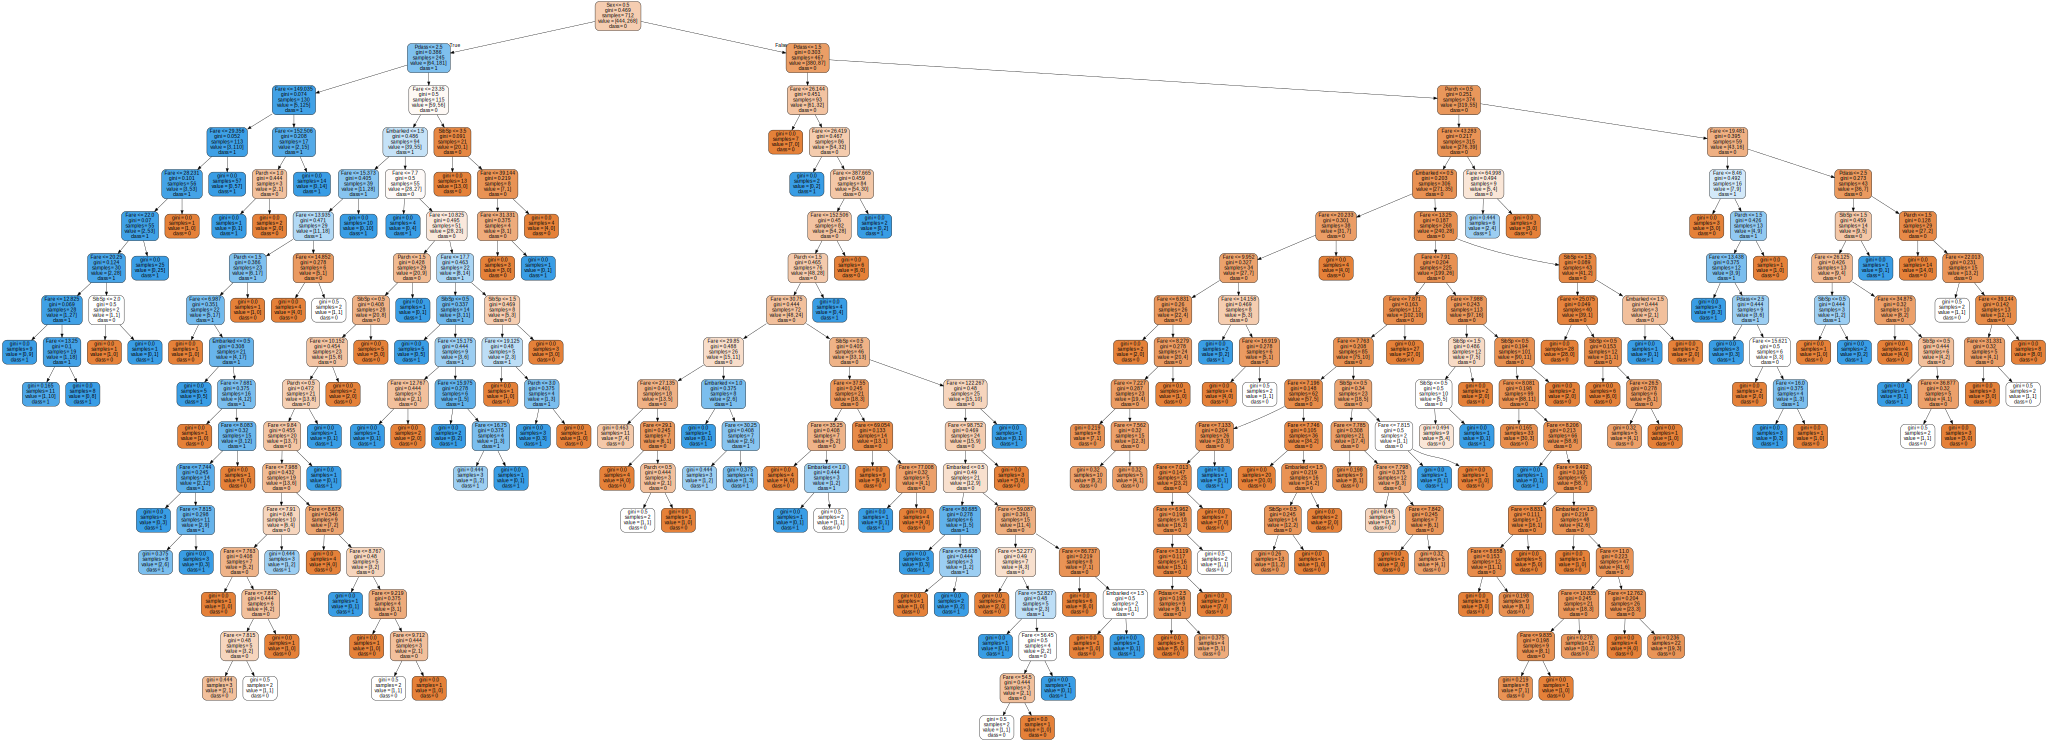

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file=("titanic_hw.dot"),
                feature_names=X_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

with open("titanic_hw.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### 4. 결과 확인

In [12]:
# accuracy, f1 score, roc_auc score, confusion matrix, classification report를 모두 불러와주세요
# 불러온 metric(결과 확인 지표)들을 통해 결과를 확인해주세요.
proba = dt_clf.predict_proba(X_test)
prediction = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

print('Accuracy:: {}'.format(accuracy_score(y_test, prediction)),
      'F1_Score:: {}'.format(f1_score(y_test, prediction)),
      'ROC_AUC_Score:: {}'.format(roc_auc_score(y_test, prediction)), sep = '\n')
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy:: 0.7932960893854749
F1_Score:: 0.7375886524822697
ROC_AUC_Score:: 0.7799227799227799
[[90 15]
 [22 52]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### 5. GridSearch를 통한 Tree pruning

In [13]:
# GridSearch를 위한 적절한 패키지를 불러와 주세요
# max_leaf_nodes를 제외한 3가지 이상의 parameter에 대한 GridSearch를 진행해주세요. scoring은 원하시는 지표로 하셔도 됩니다.
from sklearn.model_selection import GridSearchCV
grid_dt = DecisionTreeClassifier()

criterion = ['gini', 'entropy'] 
max_depth = [5, 10, 20]
max_features = ['auto', 'sqrt']

parameter_grid = {'criterion': criterion,
                    'max_depth': max_depth,
                    'max_features': max_features}

gs = GridSearchCV(estimator= grid_dt, param_grid= parameter_grid, scoring= 'f1')
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt']},
             scoring='f1')

In [14]:
# 최적 parameter 조합 / Validation score / Test score를 확인해 주세요.
print('최적 parameter: {}'.format(gs.best_params_))
print('Validation Score: {}'.format(gs.best_score_))
print('Test Score: {}'.format(gs.score(X_test, y_test)))

최적 parameter: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}
Validation Score: 0.701466479892205
Test Score: 0.7346938775510203


In [15]:
### GridSearch에 사용하신 parameter는 Decision Tree 모델 학습에서 어떤 역할을 하는지 간단하게 요약해주세요.
### ex) criterion은 decision tree의 분류 기준인 불순도 지표를 정한다.
### hint) Shift+tab

# criterion은 무엇을 불순도 지표로 할 지 정하고,
# max_depth는 모델의 최대 깊이를 정하며,
# max_features는 랜덤하게 나눌 샘플 비율을 정한다.

> ### <b>고생하셨습니다~</b>

생각보다 GridSearch의 결과가 안 좋게 나와서 이상하다 생각하신 분들도 있을 수 있습니다. GridSearch 특성상 기존에 정해준 parameter 범위 내에서 찾는 것이기 때문에 애초에 적절한 parameter 후보를 찾지 못했다면 성능이 안 좋을 수도 있습니다. 앞으로 여러 프로젝트 진행해보시면서, parameter 찾는 것에 대한 감도 스스로 익혀보시면 좋을 것 같습니다!